<a href="https://colab.research.google.com/github/surajjorwar/Decision-Tree/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Traning and visualizing a Decision Tree

In [275]:
#importing DecisionTreeClassifier and iris data sets from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_text

#Decision tree regressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import  mean_squared_error






In [276]:
iris  = load_iris()

In [277]:
X = iris.data[:,2:] # petal length and width

In [278]:
print(X[0:2]) #first 2 element of our data

[[1.4 0.2]
 [1.4 0.2]]


In [279]:
y = iris.target

In [280]:
print(y[0:2]) #first 2 element of our data

[0 0]


In [281]:
clf = DecisionTreeClassifier(max_depth = 2 ) # creating  Decision tree object
clf.fit(X,y)  # training the algorithm

DecisionTreeClassifier(max_depth=2)

visualizing the trained Decision Tree by first using the export_graphviz()
method to output a graph definition file called iris_tree.dot:

In [282]:
tree_text = export_text(clf, feature_names=iris.feature_names[2:], show_weights=True)
print(tree_text) #stores the textual representation of the Decision Tree.


|--- petal length (cm) <= 2.45
|   |--- weights: [50.00, 0.00, 0.00] class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- weights: [0.00, 49.00, 5.00] class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- weights: [0.00, 1.00, 45.00] class: 2



In [283]:
import graphviz #used for creating and rendering graphs,

dot_data = tree.export_graphviz(
    clf, out_file=None,
    feature_names=iris.feature_names[2:], class_names=iris.target_names,
    filled=True, rounded=True, special_characters=True
)
#"render" refers to the process of generating a graphical output or visual representation from the structured data or instructions

graph = graphviz.Source(dot_data)#source is used to process the DOT format data and prepare it for rendering as a graph.
graph.format = 'png'
img = graph.render("iris_decision_tree", view=True)  # Saves the visualization as 'iris_decision_tree.pdf' and opens it.

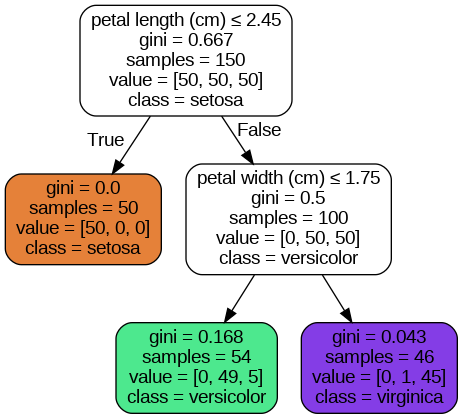

In [284]:
from IPython.display import Image # displays the image
Image(img)

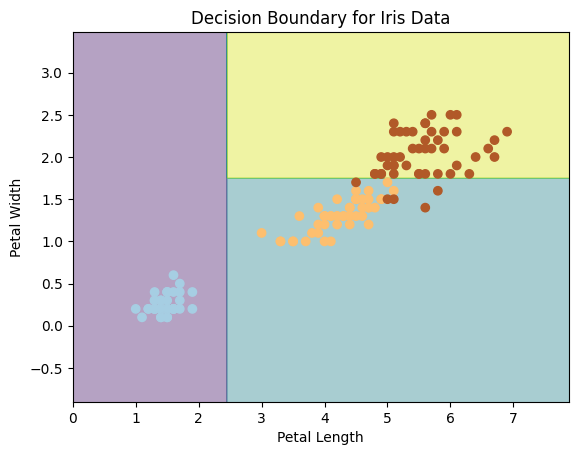

In [285]:
# Create a grid of points for the feature space
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict the class labels for each point in the grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Decision Boundary for Iris Data')
plt.show()






In [286]:
clf.predict_proba([[5, 1.5]])
# the petal length = 5, petal width = 1.5  ,
# this predict the probability of having  setosa , versicolor , verginica

array([[0.        , 0.90740741, 0.09259259]])

In [287]:
clf.predict([[5,1.5]])

array([1])

In [288]:

df = pd.read_csv('/content/drive/MyDrive/ml files/100-days-of-machine-learning-main/day48-simple-linear-regression/placement.csv')

In [289]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


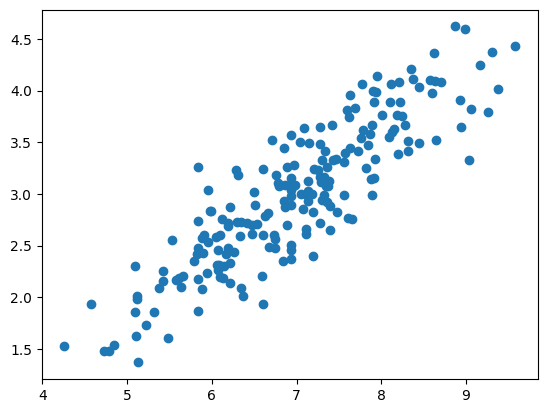

In [290]:
plt.scatter(df['cgpa'],df['package'])

In [291]:
x_df= df.iloc[:,0]
y_df= df.iloc[:,1]

In [292]:
X_train,X_test,y_train,y_test = train_test_split(x_df , y_df, test_size = 0.5)

In [293]:
X_train = X_train.array.reshape(-1, 1)
X_test = X_test.array.reshape(-1, 1)

In [294]:
reg = DecisionTreeRegressor(max_depth=2,min_samples_leaf= 1)
reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2)

In [295]:
y_pred = reg.predict(X_test)

In [296]:
mean_squared_error(y_pred,y_test)

0.1723212896867187